In [1]:
import re, json, os, itertools
import numpy as np
import pandas as pd
from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

import spacy
from spacy.lang.en import English
import seaborn as sns

In [2]:
JSONL_FILE = 'all90.jsonl'

In [3]:
df = pd.read_json (JSONL_FILE, lines=True)
df.head()

In [5]:
df['category'] = pd.NaT 
df.head()

In [7]:
df_cut = df[df['label'].map(lambda d: len(d)) > 0].copy()
df_cut.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31749 entries, 0 to 81041
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   id        31749 non-null  int64         
 1   data      31749 non-null  object        
 2   label     31749 non-null  object        
 3   category  0 non-null      datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 1.2+ MB


In [7]:
nlp = English()
df['tokens'] = df['data'].apply(lambda x: nlp(x))
df.head()

,id,data,label,category,tokens
0,339,CURRICULUM VITAE\nShiv Ahluwalia\n(M) +9199111...,"[[17, 31, Name], [33, 34, Gender], [50, 52, De...",NaT,"(CURRICULUM, VITAE, \n, Shiv, Ahluwalia, \n, (..."
1,340,E-mail: cashivahluwalia86@rediffmail.com\ncash...,"[[8, 40, Email-ID], [41, 68, Email-ID]]",NaT,"(E, -, mail, :, cashivahluwalia86@rediffmail.c..."
2,341,OBJECTIVE\n,[],NaT,"(OBJECTIVE, \n)"
3,342,"To learn, grow and make a career in the area o...","[[48, 93, Work_Skills], [99, 116, Work_Skills]]",NaT,"(To, learn, ,, grow, and, make, a, career, in,..."
4,343,CORE KNOWLEDGE & SKILL AREAS\n,[],NaT,"(CORE, KNOWLEDGE, &, SKILL, AREAS, \n)"


In [8]:
df['split_tokens'] = df['tokens'].apply(lambda x: [tok.text for tok in x])
df.head()

,id,data,label,category,tokens,split_tokens
0,339,CURRICULUM VITAE\nShiv Ahluwalia\n(M) +9199111...,"[[17, 31, Name], [33, 34, Gender], [50, 52, De...",NaT,"(CURRICULUM, VITAE, \n, Shiv, Ahluwalia, \n, (...","[CURRICULUM, VITAE, \n, Shiv, Ahluwalia, \n, (..."
1,340,E-mail: cashivahluwalia86@rediffmail.com\ncash...,"[[8, 40, Email-ID], [41, 68, Email-ID]]",NaT,"(E, -, mail, :, cashivahluwalia86@rediffmail.c...","[E, -, mail, :, cashivahluwalia86@rediffmail.c..."
2,341,OBJECTIVE\n,[],NaT,"(OBJECTIVE, \n)","[OBJECTIVE, \n]"
3,342,"To learn, grow and make a career in the area o...","[[48, 93, Work_Skills], [99, 116, Work_Skills]]",NaT,"(To, learn, ,, grow, and, make, a, career, in,...","[To, learn, ,, grow, and, make, a, career, in,..."
4,343,CORE KNOWLEDGE & SKILL AREAS\n,[],NaT,"(CORE, KNOWLEDGE, &, SKILL, AREAS, \n)","[CORE, KNOWLEDGE, &, SKILL, AREAS, \n]"


In [9]:
'''for index, row in df_cut.iterrows():
  for i in range(0,len(df_cut['label'])):
    ad = df_cut['label'][i][i][i]
    print(ad)'''
s=len(df['label'])
for i,ilist in enumerate(df['label']) :
  #i = 0
  for b in ilist:
    if b[2] == "Name":
      #df_cut['category'] = "Personal"
      df['category'][i] = "Personal"
    elif b[2] == "Email-ID":
      df['category'][i] = "Personal"
    elif b[2] == "Phone_number":
      df['category'][i] = "Personal"
    elif b[2] == "Address_Location":
      df['category'][i] = "Personal"
    elif b[2] == "DOB_DateRange":
      df['category'][i] = "Personal"
    elif b[2] == "Gender":
      df['category'][i] = "Personal"
    elif b[2] == "Marital_Status":
      df['category'][i] = "Personal"
    elif b[2] == "Language":
      df['category'][i] = "Personal"
    elif b[2] == "Main_Skills":
      df['category'][i] = "Skills"
    elif b[2] == "Work_Skills":
      df['category'][i] = "Skills"
    elif b[2] == "Organization":
      df['category'][i] = "Work_Experience"
    elif b[2] == "Work_Location":
      df['category'][i] = "Work_Experience"
    elif b[2] == "Work_DateRange":
      df['category'][i] = "Work_Experience"
    elif b[2] == "Designation":
      df['category'][i] = "Work_Experience"
    elif b[2] == "Role_Description":
      df['category'][i] = "Work_Experience"
    elif b[2] == "Course":
      df['category'][i] = "Education"
    elif b[2] == "Institute":
      df['category'][i] = "Education"
    elif b[2] == "Education_Location":
      df['category'][i] = "Education"
    elif b[2] == "Education_DateRange":
      df['category'][i] = "Education"
    elif b[2] == "Grade":
      df['category'][i] = "Education"                                      

  
'''for list in df_cut['split_tokens']:
  for b in list:
     print(df_cut)'''

<ipython-input-9-ea868ebc50af>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['category'][i] = "Personal"
C:\Users\reema\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-9-ea868ebc50af>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['category'][i] = "Personal"
<ipython-input-9-ea868ebc50af>:37: SettingWithCopyWarn

"for list in df_cut['split_tokens']:\n  for b in list:\n     print(df_cut)"

<AxesSubplot:xlabel='category'>

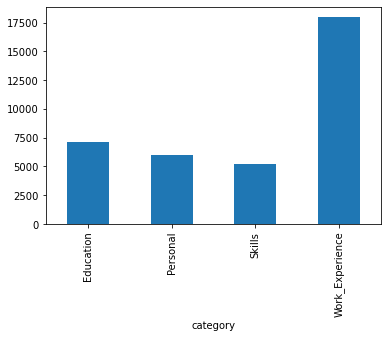

In [11]:
df.groupby(['category']).size().plot.bar()

In [12]:
df.loc[df['category'] == "Personal", "category"] = 1
df.loc[df['category'] == "Education", "category"] = 2
df.loc[df['category'] == "Work_Experience", "category"] = 3
df.loc[df['category'] == "Skills", "category"] = 4
#df.loc[df['category'] == "NaT", "category"] = 4

In [13]:
df.head(50)

,id,data,label,category,tokens,split_tokens
0,339,CURRICULUM VITAE\nShiv Ahluwalia\n(M) +9199111...,"[[17, 31, Name], [33, 34, Gender], [50, 52, De...",2,"(CURRICULUM, VITAE, \n, Shiv, Ahluwalia, \n, (...","[CURRICULUM, VITAE, \n, Shiv, Ahluwalia, \n, (..."
1,340,E-mail: cashivahluwalia86@rediffmail.com\ncash...,"[[8, 40, Email-ID], [41, 68, Email-ID]]",1,"(E, -, mail, :, cashivahluwalia86@rediffmail.c...","[E, -, mail, :, cashivahluwalia86@rediffmail.c..."
2,341,OBJECTIVE\n,[],NaT,"(OBJECTIVE, \n)","[OBJECTIVE, \n]"
3,342,"To learn, grow and make a career in the area o...","[[48, 93, Work_Skills], [99, 116, Work_Skills]]",4,"(To, learn, ,, grow, and, make, a, career, in,...","[To, learn, ,, grow, and, make, a, career, in,..."
4,343,CORE KNOWLEDGE & SKILL AREAS\n,[],NaT,"(CORE, KNOWLEDGE, &, SKILL, AREAS, \n)","[CORE, KNOWLEDGE, &, SKILL, AREAS, \n]"
5,344,"Regulatory Reporting,\nPRA/EBA/ICAAP Stress Te...","[[0, 20, Main_Skills], [52, 75, Main_Skills], ...",4,"(Regulatory, Reporting, ,, \n, PRA, /, EBA, /,...","[Regulatory, Reporting, ,, \n, PRA, /, EBA, /,..."
6,345,"Legal entity controllership,\nSTDF Reporting\n...","[[0, 27, Main_Skills], [29, 42, Main_Skills], ...",4,"(Legal, entity, controllership, ,, \n, STDF, R...","[Legal, entity, controllership, ,, \n, STDF, R..."
7,346,"Internal Audit, SOX and BCBS 239,\nCredit Risk...","[[0, 14, Main_Skills], [34, 45, Main_Skills], ...",4,"(Internal, Audit, ,, SOX, and, BCBS, 239, ,, \...","[Internal, Audit, ,, SOX, and, BCBS, 239, ,, \..."
8,347,"SEC XBRL & HMRC iXBRL,\n","[[11, 21, Main_Skills], [0, 8, Main_Skills]]",4,"(SEC, XBRL, &, HMRC, iXBRL, ,, \n)","[SEC, XBRL, &, HMRC, iXBRL, ,, \n]"
9,348,ADDITIONAL SKILLS\n,[],NaT,"(ADDITIONAL, SKILLS, \n)","[ADDITIONAL, SKILLS, \n]"


In [14]:
df = df.fillna(0)

In [ ]:
df = df[['id','data','category']]

In [32]:
df1 = df[['id1', 'id','data', 'label', 'category', 'tokens', 'split_tokens']]

In [33]:
df1.head(20)

,id1,id,data,label,category,tokens,split_tokens
0,339,3199,CURRICULUM VITAE\nShiv Ahluwalia\n(M) +9199111...,"[[17, 31, Name], [33, 34, Gender], [50, 52, De...",2,"(CURRICULUM, VITAE, \n, Shiv, Ahluwalia, \n, (...","[CURRICULUM, VITAE, \n, Shiv, Ahluwalia, \n, (..."
1,340,97763,E-mail: cashivahluwalia86@rediffmail.com\ncash...,"[[8, 40, Email-ID], [41, 68, Email-ID]]",1,"(E, -, mail, :, cashivahluwalia86@rediffmail.c...","[E, -, mail, :, cashivahluwalia86@rediffmail.c..."
2,341,43634,OBJECTIVE\n,[],0,"(OBJECTIVE, \n)","[OBJECTIVE, \n]"
3,342,87156,"To learn, grow and make a career in the area o...","[[48, 93, Work_Skills], [99, 116, Work_Skills]]",4,"(To, learn, ,, grow, and, make, a, career, in,...","[To, learn, ,, grow, and, make, a, career, in,..."
4,343,66761,CORE KNOWLEDGE & SKILL AREAS\n,[],0,"(CORE, KNOWLEDGE, &, SKILL, AREAS, \n)","[CORE, KNOWLEDGE, &, SKILL, AREAS, \n]"
5,344,60341,"Regulatory Reporting,\nPRA/EBA/ICAAP Stress Te...","[[0, 20, Main_Skills], [52, 75, Main_Skills], ...",4,"(Regulatory, Reporting, ,, \n, PRA, /, EBA, /,...","[Regulatory, Reporting, ,, \n, PRA, /, EBA, /,..."
6,345,79480,"Legal entity controllership,\nSTDF Reporting\n...","[[0, 27, Main_Skills], [29, 42, Main_Skills], ...",4,"(Legal, entity, controllership, ,, \n, STDF, R...","[Legal, entity, controllership, ,, \n, STDF, R..."
7,346,25435,"Internal Audit, SOX and BCBS 239,\nCredit Risk...","[[0, 14, Main_Skills], [34, 45, Main_Skills], ...",4,"(Internal, Audit, ,, SOX, and, BCBS, 239, ,, \...","[Internal, Audit, ,, SOX, and, BCBS, 239, ,, \..."
8,347,51437,"SEC XBRL & HMRC iXBRL,\n","[[11, 21, Main_Skills], [0, 8, Main_Skills]]",4,"(SEC, XBRL, &, HMRC, iXBRL, ,, \n)","[SEC, XBRL, &, HMRC, iXBRL, ,, \n]"
9,348,52114,ADDITIONAL SKILLS\n,[],0,"(ADDITIONAL, SKILLS, \n)","[ADDITIONAL, SKILLS, \n]"


# 

In [16]:
df.to_csv('df90.csv',index=False)

In [ ]:
df.to_csv('df_4.csv',index=False)